# Открытые данные
*И. В. Щуров, НИУ ВШЭ*

Данный notebook является материалом по курсу 
«Открытые данные» («Статистика»)
(СБ ВШЭ-РЭШ, 2016-17). Доступен под лицензией CC BY 4.0 Unported, ссылка на автора курса, аффилиацию и страницу курса обязательны. Фрагменты кода доступны под лицензией MIT.

На [странице курса](http://math-info.hse.ru/s16/e) находятся другие материалы.

### Примеры работы с REST API с помощью JSON

#### Предисловие: сложные структуры данных

Структуры данных, которые умеют хранить какие-то элементы внутри себя (они часто называются *контейнерами*) — например, списки или словари — можно использовать для создания более сложных структур данных по принципу матрёшки.

In [49]:
gradebook = [{'name': {'first': 'Alice', 'last': 'Carroll'},
              'grades': [3, 4, 5]},
             {'name': {'first': 'Bob', 'last': 'Dylan'},
              'grades': [4, 3, 2, 5]}]

Этот объект является списком (самая первая скобка — квадратная). Он состоит из двух элементов. Каждый элемент является словарём. Посмотрим на первый элемент.

In [50]:
gradebook[0]

{'grades': [3, 4, 5], 'name': {'first': 'Alice', 'last': 'Carroll'}}

Это словарь. У него две записи.

In [51]:
gradebook[0].keys()

dict_keys(['name', 'grades'])

В записи с ключём `'name'` лежит тоже словарь.

In [52]:
gradebook[0]['name']

# эта строчка эквавалентна такой:
# first_element = gradebook[0]
# first_element['name']

{'first': 'Alice', 'last': 'Carroll'}

В нём тоже две записи, соответствующие имени и фамилии. 

In [55]:
gradebook[0]['name']['first']

# эта строчка эквивалентна такой:
# first_element = gradebook[0]
# name = first_element['name']
# first_name = name['first']
# first_name

'Alice'

In [54]:
gradebook[0]['name']['last']

'Carroll'

#### Портал «ГосЗатраты» (clearspending.ru)
Документация по API лежит [здесь](https://clearspending.ru/page/for-developers/).

In [27]:
import requests
url = "http://openapi.clearspending.ru/restapi/v3/contracts/search/"
r = requests.get(url, {'customerregion':'05', 
                       'sort':'-price'})
data = r.json()

Теперь `data` — обычный объект Python.

In [28]:
type(data)

dict

In [29]:
data.keys()

dict_keys(['contracts'])

Словарь с единственным ключом.

In [31]:
contracts = data['contracts']
type(contracts)

dict

In [32]:
contracts.keys()

dict_keys(['page', 'perpage', 'data', 'total'])

Записи `'page'` и `'perpage'` определяют, какие элементы были включены в ответ сервера (на самом деле в базе больше элементов и они возвращаются «постранично»: чтобы попросить следующую страницу, надо в запросе установить параметр `'page'`).

Интересующие нас данные лежат в записи `data`.

In [37]:
type(contracts['data'])

list

In [38]:
len(contracts['data'])

50

Их 50 штук. Посмотрим на первый элемент.

In [39]:
contracts['data'][0]

{'attachments': {'attachment': [{'docDescription': 'ДС №4 ОТ 27.06.2012',
    'fileName': 'ДС №4 ОТ 27.06.2012.pdf',
    'url': 'http://zakupki.gov.ru/44fz/filestore/public/1.0/download/rgk2/file.html?uid=1ED10B5CC0390074E053AC11071A0CD4'}]},
 'contractProcedure': {'@schemeVersion': '5.2',
  'executions': {'execution': {'currency': {'code': 'RUB',
     'name': 'Российский рубль'},
    'docExecution': {'code': '37',
     'documentDate': '2011-12-31',
     'documentNum': '302',
     'name': 'Прочие документы о приемке, не указанные выше'},
    'paid': '1377658406.00',
    'paidRUR': '1377658406.00',
    'product': 'ТОННЕЛЬ АВТОДОРОЖНЫЙ'},
   'finalStageExecution': 'true',
   'ordinalNumber': '1',
   'productsCountries': {'productsCountry': {'OKPD': {'code': '45.21.22.110',
      'name': 'Работы общестроительные по строительству тоннелей'},
     'country': {'countryCode': '643',
      'countryFullName': 'Российская Федерация'},
     'productName': 'Тоннель автодорожный'}},
   'stage': {'e

Здесь очень много всякой информации. Можно посмотреть, например, цену контракта.

In [40]:
contracts['data'][0]['price']

2727237057.0

А вот так можно просматривать JSON в интерактивном режиме. (Вероятно, не будет работать при просмотре страницы в nbviewer — вам нужно скопировать этот код в собственный ноутбук и запустить.)

In [41]:
# FROM: https://www.reddit.com/r/IPython/comments/34t4m7/lpt_print_json_in_collapsible_format_in_ipython/

import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [35]:
RenderJSON(contracts)

#### Датасеты портала открытых данных г. Москвы (data.mos.ru)

Документация по API доступна [здесь](http://api.data.mos.ru/Docs). Загрузим датасет [«Показатели инвестиционной активности в городе Москве»](http://data.mos.ru/opendata/2462).

In [1]:

r = requests.get("http://api.data.mos.ru/v1/datasets/2462/rows")

In [2]:
data = r.json()

Теперь `data` — обычный объект Python.

In [3]:
type(data)

list

Конкретно список

In [4]:
len(data)

26

Из 26 элементов. Посмотрим на содержимое первого элемента этого списка.

In [5]:
data[0]

{'Cells': {'AttributeOfIndex': 'По полному кругу организаций',
  'IndexValues': [{'Quarter': 'I квартал', 'Value': 88.4, 'Year': 2009},
   {'Quarter': 'II квартал', 'Value': 98.8, 'Year': 2009},
   {'Quarter': 'III квартал', 'Value': 94.3, 'Year': 2009},
   {'Quarter': 'IV квартал', 'Value': 93.7, 'Year': 2009},
   {'Quarter': 'I квартал', 'Value': 90.4, 'Year': 2010},
   {'Quarter': 'II квартал', 'Value': 86.7, 'Year': 2010},
   {'Quarter': 'III квартал', 'Value': 94.4, 'Year': 2010},
   {'Quarter': 'IV квартал', 'Value': 97.8, 'Year': 2010},
   {'Quarter': 'I квартал', 'Value': 100.4, 'Year': 2011},
   {'Quarter': 'II квартал', 'Value': 107.8, 'Year': 2011},
   {'Quarter': 'III квартал', 'Value': 103.9, 'Year': 2011},
   {'Quarter': 'IV квартал', 'Value': 100.7, 'Year': 2011},
   {'Quarter': 'I квартал', 'Value': 101.7, 'Year': 2012},
   {'Quarter': 'II квартал', 'Value': 103.4, 'Year': 2012},
   {'Quarter': 'III квартал', 'Value': 101.1, 'Year': 2012},
   {'Quarter': 'IV квартал', '

In [6]:
type(data[0])

dict

Это словарь. Его содержание видно выше, но чтобы было проще разобраться, что к чему, можем вывести список ключей.

In [7]:
data[0].keys()

dict_keys(['global_id', 'Number', 'Cells'])

Судя по всему, интересующая нас запись — `'Cells'`.

In [9]:
data[0]['Cells']

{'AttributeOfIndex': 'По полному кругу организаций',
 'IndexValues': [{'Quarter': 'I квартал', 'Value': 88.4, 'Year': 2009},
  {'Quarter': 'II квартал', 'Value': 98.8, 'Year': 2009},
  {'Quarter': 'III квартал', 'Value': 94.3, 'Year': 2009},
  {'Quarter': 'IV квартал', 'Value': 93.7, 'Year': 2009},
  {'Quarter': 'I квартал', 'Value': 90.4, 'Year': 2010},
  {'Quarter': 'II квартал', 'Value': 86.7, 'Year': 2010},
  {'Quarter': 'III квартал', 'Value': 94.4, 'Year': 2010},
  {'Quarter': 'IV квартал', 'Value': 97.8, 'Year': 2010},
  {'Quarter': 'I квартал', 'Value': 100.4, 'Year': 2011},
  {'Quarter': 'II квартал', 'Value': 107.8, 'Year': 2011},
  {'Quarter': 'III квартал', 'Value': 103.9, 'Year': 2011},
  {'Quarter': 'IV квартал', 'Value': 100.7, 'Year': 2011},
  {'Quarter': 'I квартал', 'Value': 101.7, 'Year': 2012},
  {'Quarter': 'II квартал', 'Value': 103.4, 'Year': 2012},
  {'Quarter': 'III квартал', 'Value': 101.1, 'Year': 2012},
  {'Quarter': 'IV квартал', 'Value': 100.4, 'Year': 201

In [10]:
data[0]['Cells']['Name']

'Индекс промышленного производства, в % к соответствующему периоду предыдущего года'

In [7]:
data[0]['Cells']['IndexValues']

[{'Quarter': 'I квартал', 'Value': 88.4, 'Year': 2009},
 {'Quarter': 'II квартал', 'Value': 98.8, 'Year': 2009},
 {'Quarter': 'III квартал', 'Value': 94.3, 'Year': 2009},
 {'Quarter': 'IV квартал', 'Value': 93.7, 'Year': 2009},
 {'Quarter': 'I квартал', 'Value': 90.4, 'Year': 2010},
 {'Quarter': 'II квартал', 'Value': 86.7, 'Year': 2010},
 {'Quarter': 'III квартал', 'Value': 94.4, 'Year': 2010},
 {'Quarter': 'IV квартал', 'Value': 97.8, 'Year': 2010},
 {'Quarter': 'I квартал', 'Value': 100.4, 'Year': 2011},
 {'Quarter': 'II квартал', 'Value': 107.8, 'Year': 2011},
 {'Quarter': 'III квартал', 'Value': 103.9, 'Year': 2011},
 {'Quarter': 'IV квартал', 'Value': 100.7, 'Year': 2011},
 {'Quarter': 'I квартал', 'Value': 101.7, 'Year': 2012},
 {'Quarter': 'II квартал', 'Value': 103.4, 'Year': 2012},
 {'Quarter': 'III квартал', 'Value': 101.1, 'Year': 2012},
 {'Quarter': 'IV квартал', 'Value': 100.4, 'Year': 2012},
 {'Quarter': 'I квартал', 'Value': 98.6, 'Year': 2013},
 {'Quarter': 'II квартал

Это наша табличка. Она является списком словарей. Например, вот так её можно вывести на экран.

In [13]:
def print_table(number):
    """
    Prints table with given number
    """
    for row in data[number]['Cells']['IndexValues']:
        print("{}\t{}\t{}".format(
            row['Year'], row['Quarter'], row['Value']))

Здесь `\t` — символ табуляции. Подробнее о том, как работает метод `.format()`, написано [здесь](https://pyformat.info).

In [14]:
print_table(1)

2009	I квартал	479816.7
2009	II квартал	575763.4
2009	III квартал	590717.4
2009	IV квартал	670106
2010	I квартал	598513.2
2010	II квартал	589530.1
2010	III квартал	593478.7
2010	IV квартал	792764.5
2011	I квартал	690680.9
2011	II квартал	793611.1
2011	III квартал	795312.1
2011	IV квартал	950213.4
2012	I квартал	834887.1
2012	II квартал	780183.6
2012	III квартал	880620.6
2012	IV квартал	1005726.5
2013	I квартал	1018550.6
2013	II квартал	1056801.1
2013	III квартал	1376838.1
2013	IV квартал	1507148.6
2014	I квартал	1431129.1
2014	II квартал	1357752.8
2014	III квартал	1256521.2
2014	IV квартал	1539188.9
2015	I квартал	1315146.9
2015	II квартал	1307375.3
2015	III квартал	1387084.7
2015	IV квартал	1486856
2016	I квартал	1189522.1
2016	II квартал	1426686.3
2016	III квартал	1466734.2


Теперь нарисуем немножко графиков.

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline
# эта магическая строчка нужна, чтобы графики рисовались прямо внутри ноутбука

In [23]:
def plot_table(number):
    x = []
    y = []
    quarters_to_years = {'I квартал':0, 
                         'II квартал':0.25, 
                         'III квартал':0.5, 
                         'IV квартал':0.75}
    print(data[number]['Cells']['Name'])
    for row in data[number]['Cells']['IndexValues']:
        y.append(row['Value'])
        x.append(row['Year'] + quarters_to_years[row['Quarter']])
    plt.bar(x, y, width=0.25);

Отгружено товаров собственного производства, выполнено работ и услуг собственными силами, млн рублей


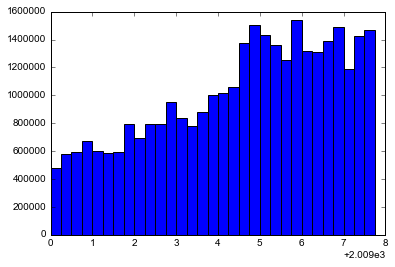

In [25]:
plot_table(1)

Вот так можно расставлять метки на осях. (Но вообще рисовать такие графики проще с помощью pandas, о чём мы поговорим позже.)

Объем работ, выполненных по виду деятельности "Строительство", в % к соответствующему периоду предыдущего года


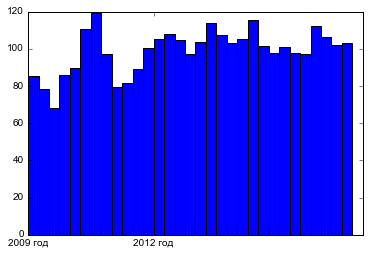

In [26]:
plt.rc('font', family='Arial')
plot_table(3)
plt.xticks([2009, 2012], ['2009 год', '2012 год']);